In [1]:
import sys
# Assuming we are in the notebook directory add this so that we can import the library
sys.path.append('..')

import time

import numpy as np
import dask
import GPy
from abcpy.core import *
from abcpy.distributions import *
from abcpy.examples.ma2 import *
from abcpy.methods import *
from distributed import Client
from dask.dot import dot_graph
from functools import partial

import matplotlib
import matplotlib.pyplot as plt

#matplotlib.style.use('ggplot')
#%matplotlib inline


In [2]:
n = 1000
t1 = 0.6
t2 = 0.2

# Set up observed data y
latents = np.random.randn(n+2)
y = MA2(n, 1, t1, t2, latents=latents)

# Plot
if False:
    plt.figure(figsize=(11, 6))
    plt.plot(np.arange(0,n),y[0,:])
    plt.scatter(np.arange(-2,n), latents);

In [3]:
# Set up the simulator
simulator = partial(MA2, n)

# Set up autocovariance summaries
ac1 = partial(autocov, 1)
ac2 = partial(autocov, 2)

# Specify the graphical model
t1 = Prior('t1', 'uniform', 0, 1)
#t2 = Prior('t2', 'uniform', 0, 1)
Y = Simulator('MA2', simulator, t1, t2, observed=y)
S1 = Summary('S1', ac1, Y)
S2 = Summary('S2', ac2, Y)
d = Discrepancy('d', distance, S1, S2)

# Specify the number of simulations
n_sim = 20
n_batch = 4

/home/akangasr/abcpy/.venv/lib/python3.4/site-packages/distributed/deploy/local.py - INFO - To start diagnostics web server please install Bokeh


GpyModel: No bounds supplied, defaulting to [0,1] bounds.


GP - INFO - initializing Y
 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/GPy/util/normalizer.py:45: RuntimeWarning:invalid value encountered in true_divide
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters


Sampling 20 samples in batches of 4


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater


GpyModel: Numerical error in GP optimization! Reverting to previous model.


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


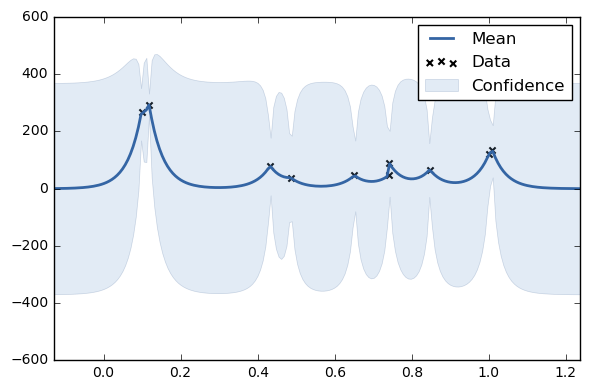

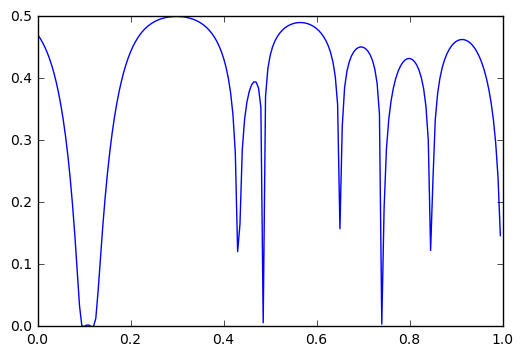

In [4]:
bolfi = BOLFI(10, d, [t1], batch_size=n_batch, n_surrogate_samples=n_sim)
post = bolfi.infer()
fig = bolfi.model.gp.plot()
GPy.plotting.show(fig)
post.plot()

/home/akangasr/abcpy/.venv/lib/python3.4/site-packages/distributed/deploy/local.py - INFO - To start diagnostics web server please install Bokeh


GpyModel: No bounds supplied, defaulting to [0,1] bounds.


GP - INFO - initializing Y


Sampling 20 samples asynchronously 4 samples in parallel


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/GPy/util/normalizer.py:45: RuntimeWarning:invalid value encountered in true_divide
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters


GpyModel: Numerical error in GP optimization! Reverting to previous model.


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater


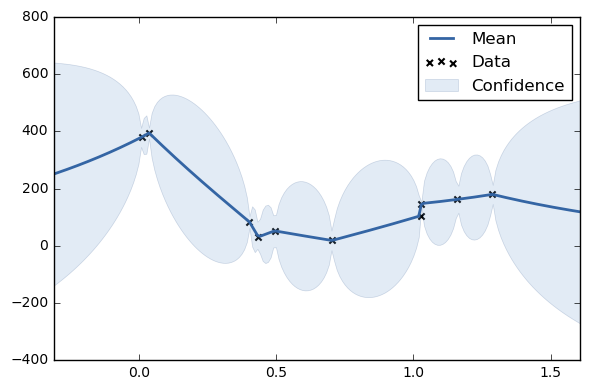

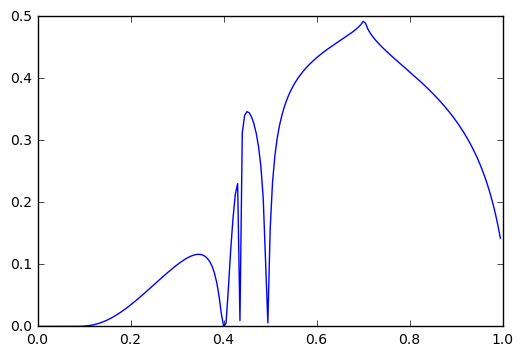

In [5]:
async_bolfi = BOLFI(10, d, [t1], sync=False, batch_size=n_batch, n_surrogate_samples=n_sim)
async_post = async_bolfi.infer()
fig = async_bolfi.model.gp.plot()
GPy.plotting.show(fig)
async_post.plot()

In [6]:
from IPython.display import display
display(bolfi.model.gp)
display(async_bolfi.model.gp)

GP_regression.,value,constraints,priors
rbf.variance,1.82185547464,+ve,
rbf.lengthscale,0.217054300031,+ve,
Gaussian_noise.variance,0.111842382091,+ve,


GP_regression.,value,constraints,priors
rbf.variance,5.73389887571,+ve,
rbf.lengthscale,0.427748294042,+ve,
Gaussian_noise.variance,0.051894528676,+ve,


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


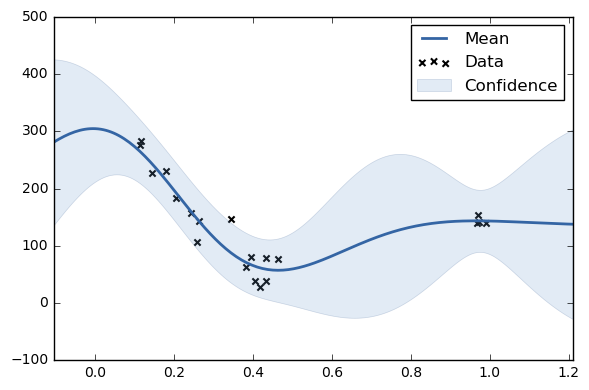

In [7]:
fig = bolfi.model.gp.plot()
GPy.plotting.show(fig)

 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


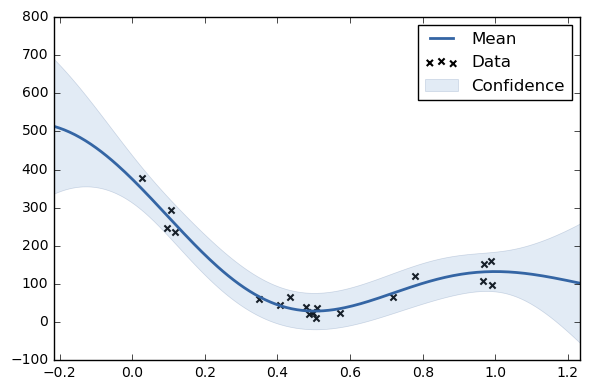

In [8]:
fig = async_bolfi.model.gp.plot()
GPy.plotting.show(fig)